## How to query electron execution status

Let us first define a workflow comprised of subtasks. Adding subtasks to workflows is discussed in greater detail in [How to add electrons to lattices](../orchestration/add_electron_to_lattice.ipynb).

In [2]:
import covalent as ct

import time

@ct.electron
def add(x, y):
    time.sleep(5)
    return x + y

@ct.electron
def multiply(x, y):
    return x * y

@ct.lattice
def workflow(x, y):
    res_1 = add(x=x, y=y)
    return multiply(x=res_1, y=y)

Then we visualize the plots (described in [How to visualize lattices](../orchestration/visualize_lattice.ipynb)) to find out the node ids for the electrons / subtasks. 

In [8]:
dispatch_id = ct.dispatch(workflow)(x=1, y=2)

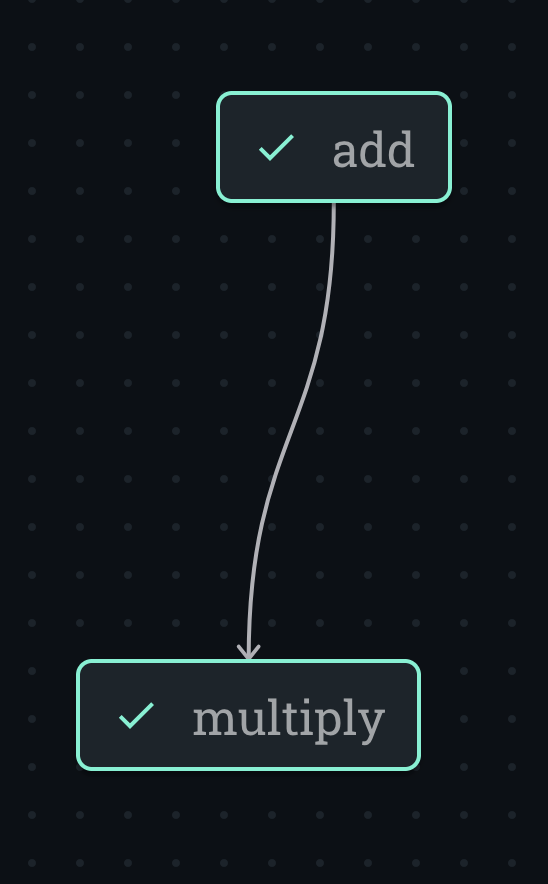

In [10]:
from IPython import display
display.Image("images/query_electron_image.png", height="20pc")

Once the lattice has been constructed and dispatched (as shown below), we can query the status of individual subtask execution status using the node ids from the lattice visualization.

.. tip:: Once workflows have been dispatched to the server and the dispatch ids are stored, the user can then query the results later using `ct.get_result`.

In [4]:
dispatch_id = ct.dispatch(workflow)(x=1, y=2)
time.sleep(2)
result = ct.get_result(dispatch_id=dispatch_id, wait=False)
result.get_node_result(node_id=0)['status']

Status(STATUS='RUNNING')

Once we query the nodes being executed, we have access to the execution status via the `status` field which take the values `RUNNING` or `COMPLETED` (or `NEW_OBJECT`, if the task has not yet been dispatched).

.. tip: Retrieve result before querying individual node execution status.